In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

Using TensorFlow backend.


In [2]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(include_top=True, weights='imagenet')

574717952/574710816 [==============================] - 86s 0us/step


In [3]:
# Define default image size for VGG19
image_size = (224, 224)

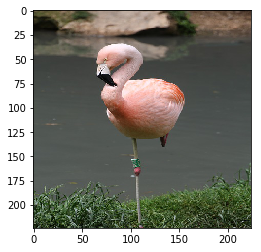

In [4]:
# Load the image and resize to default image size
image_path = os.path.join("..", "Images", "bird1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [8]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [[('n02007558', 'flamingo', 0.9688598), ('n01855672', 'goose', 0.009939615), ('n02006656', 'spoonbill', 0.008081735)]]


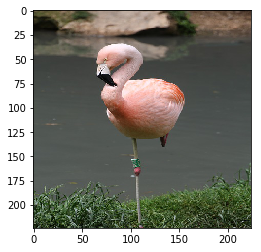

In [9]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [10]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

Predicted: [[('n01622779', 'great_grey_owl', 0.9347007), ('n01608432', 'kite', 0.008001395), ('n02018795', 'bustard', 0.0069829477)]]


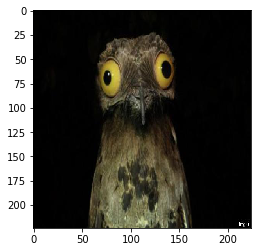

In [11]:
image_path = os.path.join("..", "Images", "bird2.jpg")
predict(image_path)

Predicted: [[('n02099712', 'Labrador_retriever', 0.5586022), ('n02099601', 'golden_retriever', 0.093815625), ('n02104029', 'kuvasz', 0.060889363)]]


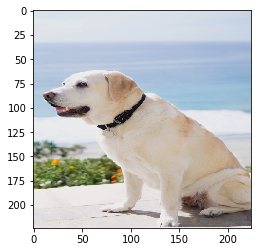

In [12]:
image_path = os.path.join("..", "Images", "jay.jpg")
predict(image_path)

Predicted: [[('n02099601', 'golden_retriever', 0.90046936), ('n02099712', 'Labrador_retriever', 0.053393263), ('n02102318', 'cocker_spaniel', 0.010580142)]]


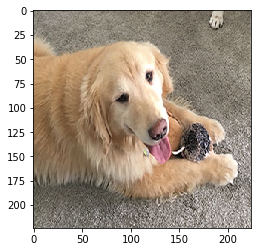

In [13]:
image_path = os.path.join("..", "Images", "denver.jpg")
predict(image_path)